Abaixo temos um dataframe com as seguintes informações:


**Nome:** O nome de cada indivíduo da base


**Idade:** A idade de cada um deles


**Profissão:** A atual ocupação


**Salário:** O salário registrado


**Limite de crédito:** O limite de crédito disponível para cada um dos indivíduos


**Historico_Inadimplencia:** Marco como 0 aqueles que nunca tiveram um histórico de inadimplência e como 1 aqueles que já tiveram em algum momento.


**Estado civil:** O estado civil de cada um deles


**Imovel_Proprio:** Marcado como 0 aqueles que não tem imóvel próprio e como 1 aqueles que tem.

In [137]:
import pandas as pd

# Dados fornecidos
data = {
    'Nome': ['Alice', 'Joao', 'Charlie', 'David', 'Eva', 'Diego', 'Denize', 'Claudio'],
    'Idade': [25, 30, 35, 40, 45, 60, 22, 24],
    'Profissão': ['Engenheiro', 'Médico', 'Professor', 'Advogado', 'Médico', 'Engenheiro', 'Estudante', 'Estudante'],
    'Salário': [4500, 8000, 5000, 10000, 12000, 15000, 1200, 1500],
    'Limite_Credito': [2500, 4000, 4000, 1000, 10000, 2000, 500, 250],
    'Historico_Inadimplencia': [0, 0, 0, 1, 0, 1, 0, 1],
    'Estado_Civil': ['Casamento', 'Casamento', 'Solteiro', 'Solteiro', 'Casamento', 'Solteiro', 'Solteiro', 'Solteiro'],
    'Imovel_Proprio': [0, 0, 0, 1, 1, 1, 0, 0]
}

# Criando DataFrame
df = pd.DataFrame(data)

print(df)



      Nome  Idade   Profissão  Salário  Limite_Credito  \
0    Alice     25  Engenheiro     4500            2500   
1     Joao     30      Médico     8000            4000   
2  Charlie     35   Professor     5000            4000   
3    David     40    Advogado    10000            1000   
4      Eva     45      Médico    12000           10000   
5    Diego     60  Engenheiro    15000            2000   
6   Denize     22   Estudante     1200             500   
7  Claudio     24   Estudante     1500             250   

   Historico_Inadimplencia Estado_Civil  Imovel_Proprio  
0                        0    Casamento               0  
1                        0    Casamento               0  
2                        0     Solteiro               0  
3                        1     Solteiro               1  
4                        0    Casamento               1  
5                        1     Solteiro               1  
6                        0     Solteiro               0  
7            

In [21]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns


# principais impulsionadores para aqueles que tem limite de crédito alto.


Justifiquem a escolha dos visuais e despertem o lado analítico de vocês com uma análise acerca do descoberto através dos gráficos. Lembrem o que aprendemos na aula, devemos ser assertivos na nossa mensagem.

# RELAÇÃO ENTRE ESTADO CIVIL, HISTÓRICO DE INADIMPLÊNCIA E LIMITE DE CRÉDITO

* Agrupamento de Estado Civil e Histórico de Inadimplência:
    
* Agrupamento: Soma dos dois critérios (Estado Civil + Histórico de Inadimplência)
    
* Exemplo: Solteiro com inadimplência resulta em um score de 2.
    
* Objetivo: Mostrar que pessoas com esses dois requisitos (Solteiro + Inadimplência) tendem a ter limites de crédito menores.
    
# Análise e Conclusão:
  * Os grupos com Score 2 (Solteiro e Inadimplente) apresentam a menor média de Limite de Crédito.
  * Grupos com Score 0 (Casado e Não Inadimplente) e Score 1 (Solteiro e Não Inadimplente) tendem a ter limites maiores.
  * Isso reflete a influência de Estado Civil e Histórico de Inadimplência na concessão de crédito.

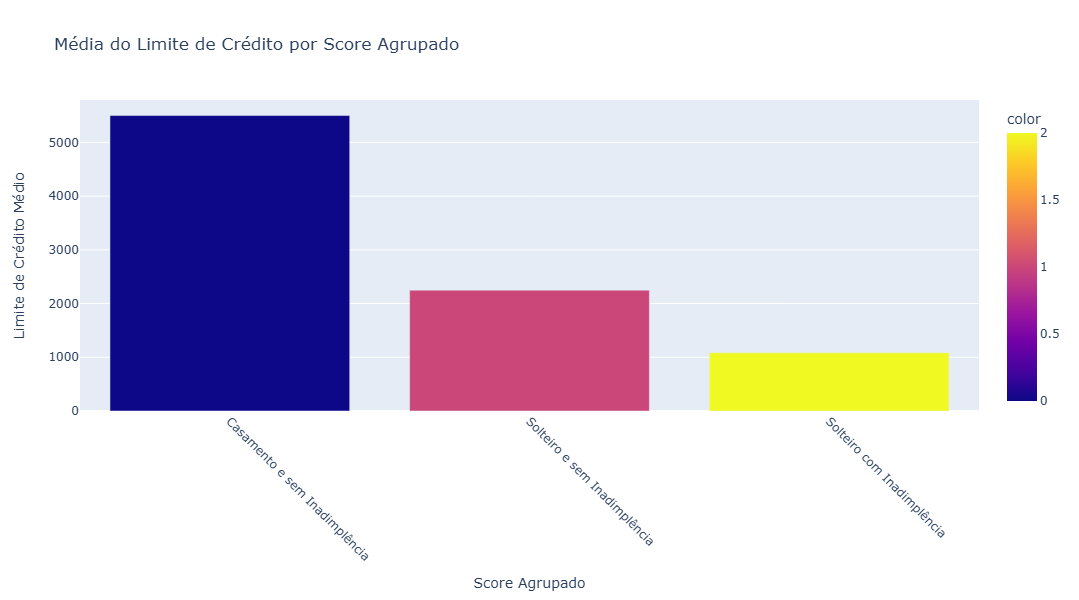

In [13]:
df['Limite_Credito'] = pd.to_numeric(df['Limite_Credito'], errors='coerce')

# Convertendo Estado_Civil para numérico
df['Estado_Civil_Num'] = df['Estado_Civil'].fillna('Casado').map({'Casamento': 0, 'Solteiro': 1})

# Convertendo a coluna Historico_Inadimplencia para numérico
df['Historico_Inadimplencia'] = pd.to_numeric(df['Historico_Inadimplencia'], errors='coerce')

# Criando a coluna Score_Agrupado
df['Score_Agrupado'] = df['Estado_Civil_Num'] + df['Historico_Inadimplencia']



# Supondo que você já tenha calculado a média por Score Agrupado:
# média de limite de crédito por Score Agrupado
media_score_por_agrupado = df.groupby('Score_Agrupado')['Limite_Credito'].mean()



# Ordenar o Score Agrupado por rótulos legíveis
score_agrupado_desc = {0: 'Casamento e sem Inadimplência',
                       1: 'Solteiro e sem Inadimplência',
                       2: 'Solteiro com Inadimplência'}

fig = px.bar(x=[score_agrupado_desc[x] for x in media_score_por_agrupado.index], 
             y=media_score_por_agrupado.values, 
             title='Média do Limite de Crédito por Score Agrupado',
             labels={'x': 'Score Agrupado', 'y': 'Limite de Crédito Médio'},
             color=media_score_por_agrupado.index,
             width=1000,  # Define a largura do gráfico em pixels
             height=600,
             color_discrete_map={0: 'blue', 1: 'orange', 2: 'red'})
fig.update_layout(xaxis_tickangle=45)  # Ajusta o ângulo dos rótulos no eixo X
fig.show()


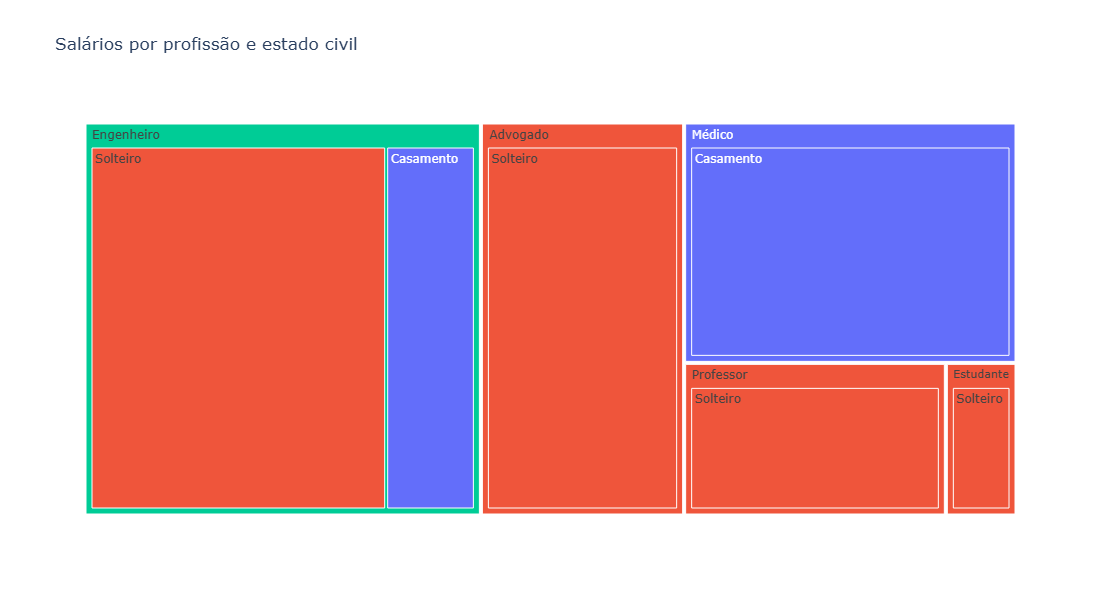

In [139]:

# agrupando os dados do dataframe por profissao e estado civil, e calculando a media do salario para cada profissao e estado
salario_por_profissao_estado_civil = df.groupby(['Profissão', 'Estado_Civil'])['Salário'].mean().reset_index()


fig = px.treemap(salario_por_profissao_estado_civil,
                 path=['Profissão', 'Estado_Civil'],
                 values='Salário',
                 title='Salários por profissão e estado civil',
                 color='Estado_Civil',
                 width=1000,  # Define a largura do gráfico em pixels
                 height=600   # Define a altura do gráfico em pixels
                )
fig.show()
s

# Gráfico de Dispersão com Linha de Tendência

O grafico Análisa duas variaveis estado civil e idade.

Idade: Podemos analisar que não tem tanta relevancia no alto limite de credito do cliente.

Estado_Civil: Podemos analisar que pessoas casadas tem a tendencia de ter o maior limite_credito

<Figure size 1000x600 with 0 Axes>

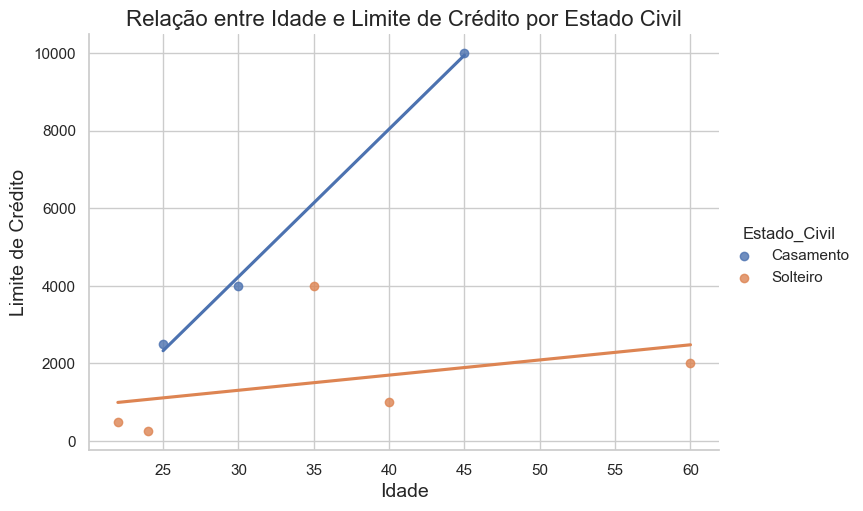

In [30]:
# Definir o estilo do gráfico
sns.set(style="whitegrid")

# Criar o gráfico de dispersão com linha de tendência
plt.figure(figsize=(10, 6))

sns.lmplot(x='Idade', y='Limite_Credito', hue='Estado_Civil', data=df, logistic=False, aspect=1.5, ci=None)

# Adicionar título e rótulos aos eixos
plt.title('Relação entre Idade e Limite de Crédito por Estado Civil', fontsize=16)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Limite de Crédito', fontsize=14)

# Mostrar o gráfico
plt.show()


1. Média (mean)
O que é: A média é o valor médio do limite de crédito dentro de cada grupo (casados e solteiros). Ela é calculada somando todos os valores e dividindo pelo número de elementos.
Interpretação:
Para os casados, o limite de crédito médio é 5500.
Para os solteiros, o limite de crédito médio é 1550.
Isso sugere que, em média, os casados têm limites de crédito significativamente mais altos do que os solteiros.

2. Desvio Padrão (std)
O que é: O desvio padrão mede a variabilidade ou dispersão dos dados em torno da média. Um valor mais alto indica que os dados estão mais dispersos em relação à média, e um valor mais baixo indica que os dados estão mais próximos da média.
Interpretação:
Para os casados, o desvio padrão é 3968.63, o que indica uma maior variabilidade nos limites de crédito. Ou seja, os limites de crédito dos casados variam bastante (alguns casados têm limites muito altos, enquanto outros têm limites mais baixos).
Para os solteiros, o desvio padrão é 1524.80, o que é menor, indicando que os limites de crédito dos solteiros são mais próximos da média, com menos variação em comparação com os casados.

3. Mínimo (min)
O que é: O valor mínimo é o limite de crédito mais baixo dentro do grupo.
Interpretação:
O limite de crédito mínimo para os casados é 2500.
O limite de crédito mínimo para os solteiros é 250.
Isso mostra que, para os solteiros, existem limites de crédito bem baixos, enquanto os casados têm um limite mínimo consideravelmente mais alto.

4. Máximo (max)
O que é: O valor máximo é o limite de crédito mais alto dentro do grupo.
Interpretação:
O limite de crédito máximo para os casados é 10000.
O limite de crédito máximo para os solteiros é 4000.
Isso sugere que o limite de crédito máximo para os casados é bem maior do que o máximo dos solteiros, indicando que os casados tendem a ter acesso a limites de crédito mais altos, em geral.


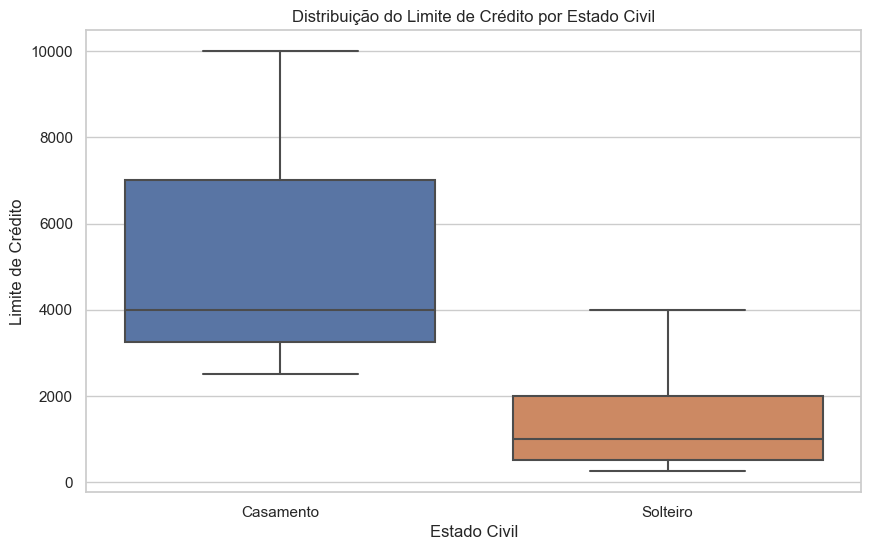

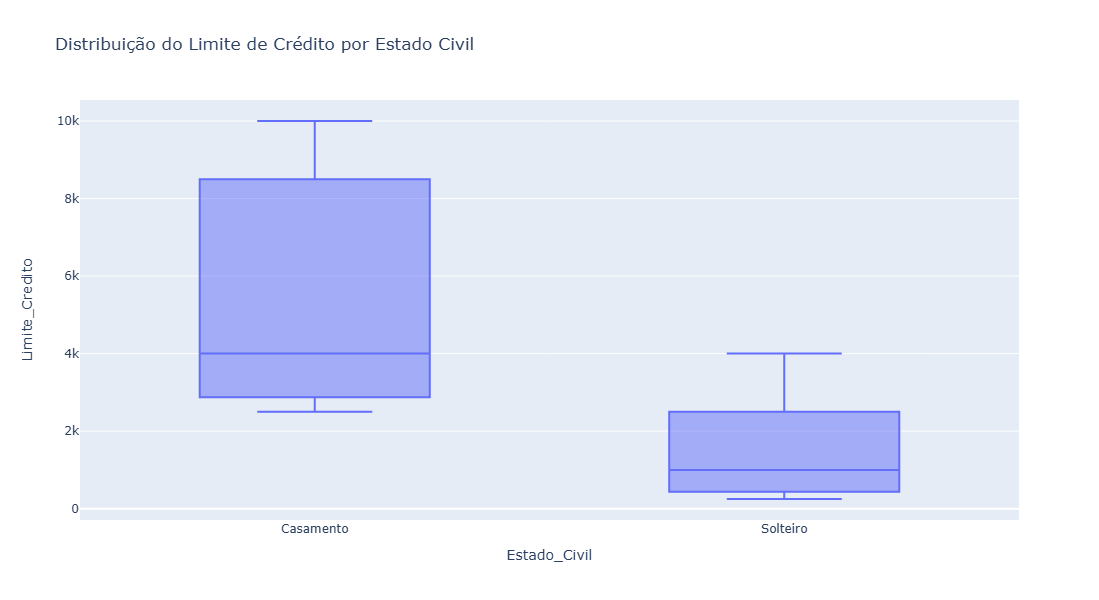

In [39]:
# Calcular a média e o desvio padrão do limite de crédito por estado civil
resumo = df.groupby('Estado_Civil')['Limite_Credito'].agg(['mean', 'std', 'min', 'max'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Estado_Civil', y='Limite_Credito', data=df)
plt.title('Distribuição do Limite de Crédito por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Limite de Crédito')
plt.show()


fig = px.box(df, x='Estado_Civil', y='Limite_Credito',
title = 'Distribuição do Limite de Crédito por Estado Civil',
    width=1000,  # Define a largura do gráfico em pixels
    height=600 
)
fig.show()    

# RESUMO


Os impulsionadores de Credito: Ser casado e sem Inadimplência


